[Reference](https://ai.plainenglish.io/k-means-clustering-explained-from-intuition-to-code-and-visualization-133775129f95)

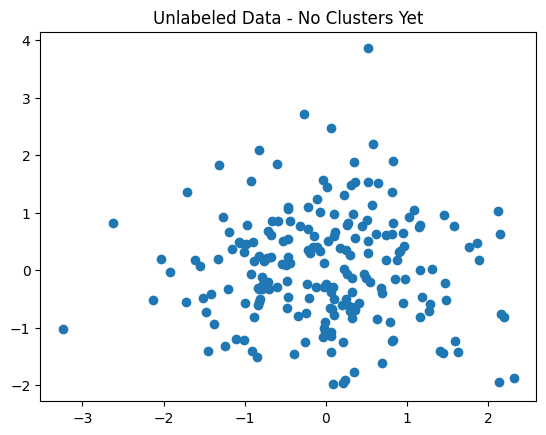

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)
X = np.random.randn(200, 2)

plt.scatter(X[:, 0], X[:, 1])
plt.title("Unlabeled Data - No Clusters Yet")
plt.show()

In [2]:
import numpy as np

class KMeansScratch:
    def __init__(self, n_clusters=3, max_iters=100, tol=1e-4):
        self.k = n_clusters
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        random_indices = np.random.choice(len(X), self.k, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
            shift = np.linalg.norm(self.centroids - new_centroids)
            if shift < self.tol:
                break
            self.centroids = new_centroids
        self.labels_ = labels

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

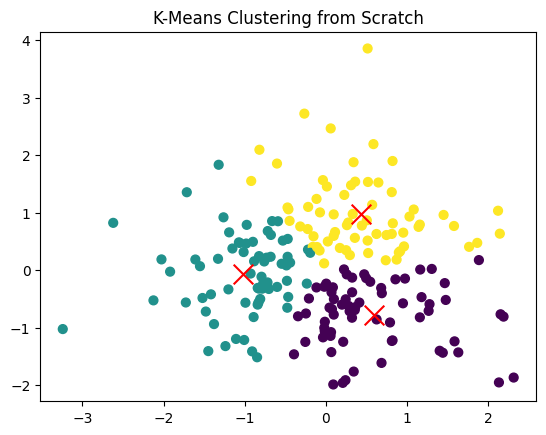

In [3]:
import matplotlib.pyplot as plt

kmeans = KMeansScratch(n_clusters=3)
kmeans.fit(X)

#Visualize Clustering Results
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=40)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200)
plt.title("K-Means Clustering from Scratch")
plt.show()

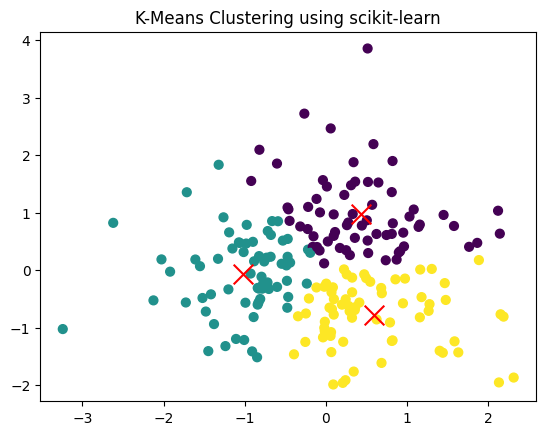

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=40)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='x')
plt.title("K-Means Clustering using scikit-learn")
plt.show()

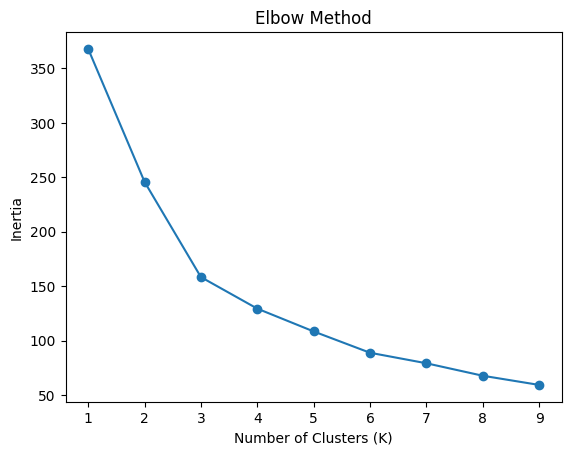

In [5]:
inertias = []
K_values = range(1, 10)

for k in K_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

plt.plot(K_values, inertias, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [6]:
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.315
K=3, Silhouette Score=0.360
K=4, Silhouette Score=0.323
K=5, Silhouette Score=0.323
K=6, Silhouette Score=0.345
